In [58]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random
import math

In [14]:
def readImagePgm(file_name):
    file = open(file_name, "r")
    lines = file.readlines() 
    for line in list(lines):
        if(line[0]=='#'):
            lines.remove(line)
    l = []
    for line in list(lines):
        for word in line.split():
            l.append(word)      
    p = l[0]
    if (p!='P2' and p!='P5'):
        print('Insupported format')
        exit()
    del(l[0]) 
    lx = int(l[0])
    del(l[0])
    ly = int(l[0])
    del(l[0])
    density = int(l[0])
    del(l[0])
    for i in range(0,len(l)):
        l[i] = int(l[i]) 
    l= np.array(l)       
    matrix = np.matrix(l.reshape((lx, ly)))
    file.close()
    return matrix

In [15]:
def writeImagePgm(m, lx, ly, density, output_file):
    file = open(output_file, "w")
    file.write("P2")
    file.write(f'\n{lx}')
    file.write(f' {ly}')
    file.write(f'\n{density}\n')
    arr = np.matrix(m)
    arr_d = (np.asarray(arr)).flatten()
    for i in range(len(arr_d)):
        file.write(f'{arr_d[i]} ')
    file.close()

In [20]:
matrix = readImagePgm('images/pic1.pgm')
matrix

matrix([[ 70, 205, 205, ..., 205, 205, 205],
        [205, 205, 205, ..., 205, 205, 205],
        [205, 205, 205, ..., 205, 205, 205],
        ...,
        [ 28,  30,  30, ..., 160, 164, 168],
        [180, 188, 191, ..., 194, 195, 195],
        [193, 193, 192, ...,  62,  79,  74]])

(-0.5, 479.5, 639.5, -0.5)

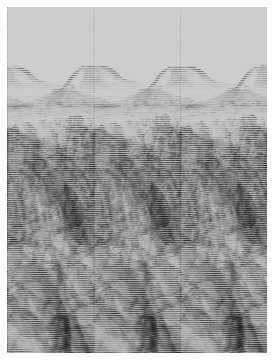

In [21]:
plt.figure(figsize=(14,14)) 
plt.subplot(2,1,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

In [50]:
def mean_stdev(matrix):
    matrix = np.matrix(matrix)
    mean = matrix.mean()
    stdev = np.std(matrix)
    return mean, stdev

In [51]:
mean_stdev(matrix)

(155.12071940104167, 55.92556297565471)

# Contrast

## Histogram Equalization

In [22]:
def histogram (matrix):
    matrix = np.matrix(matrix)
    lx,ly = matrix.shape
    histogram = np.zeros(256).astype(int)
    for i in range (256):
        pixels_value_i = np.sum (matrix == i )
        histogram[i] = pixels_value_i
    return histogram

In [26]:
def show_histogram(histogram):
    plt.bar(range(256), histogram)
    plt.xlabel('Graylevel / intensity')
    plt.ylabel('Frequency')

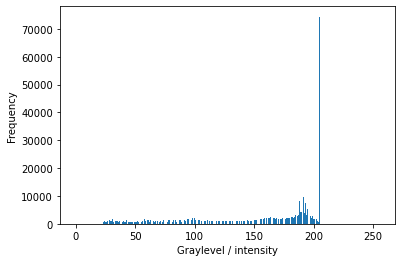

In [27]:
hist = histogram(matrix)
show_histogram(hist)

In [23]:
def cumulative_histogram (histogram):
    histC = np.zeros(256).astype(int)
    histC[0] = histogram[0]
    for i in range(1,  256):
        histC[i] = histogram[i] + histC[i-1]
    return(histC)

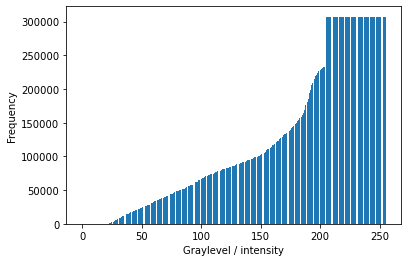

In [28]:
histC = cumulative_histogram (hist)
show_histogram(histC)

In [29]:
def histogram_equalization(matrix):
    hist = histogram(matrix)
    histC = cumulative_histogram (hist)
    hist_transform = np.zeros(256).astype(np.uint8)
    N, M = matrix.shape
    # create the image to store the equalised version
    matrix_eq = np.zeros([N,M]).astype(np.uint8)
    for z in range(256):
        s = ((255)/float(M*N))*histC[z]
        matrix_eq[ np.where(matrix == z) ] = s
        hist_transform[z] = s
    return (matrix_eq, hist_transform)

In [30]:
img_eq, img_transf = histogram_equalization(matrix)
hist_img = histogram(matrix)
histeq_img = histogram(img_eq)

Text(0, 0.5, 'Frequency')

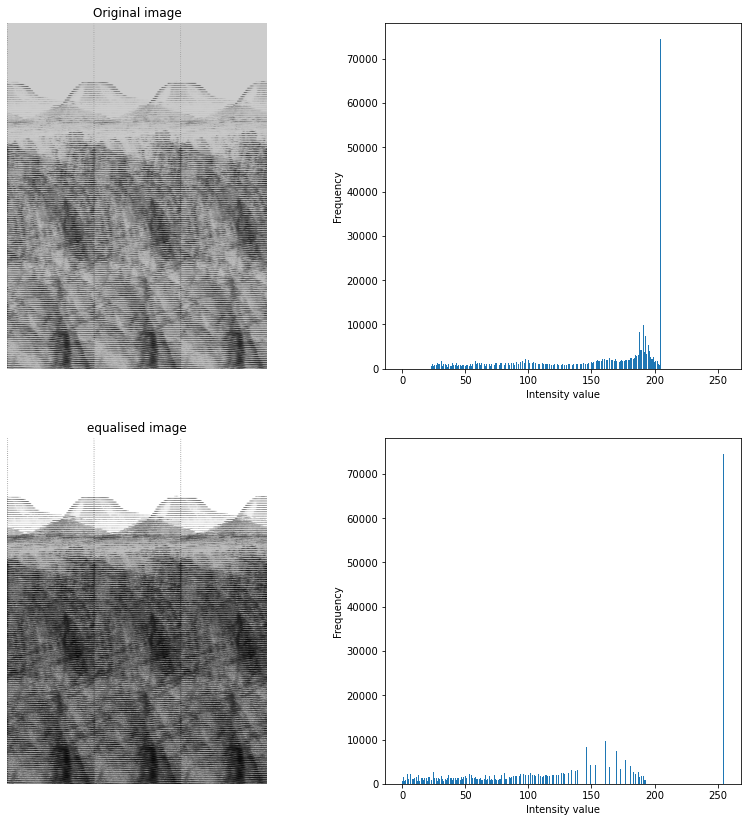

In [32]:
plt.figure(figsize=(14,14)) 
plt.subplot(2,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')
plt.subplot(2,2,2)
plt.bar(range(256), hist_img)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.imshow(img_eq, cmap="gray", vmin=0, vmax=255)
plt.title('equalised image')
plt.axis('off')
plt.subplot(2,2,4)
plt.bar(range(256), histeq_img)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

## Linear Transformation

In [43]:
def linear_transformation(matrix):
    matrix = np.matrix(matrix)
    max = matrix.max()
    min = matrix.min()
    matrix_transformed = (255/(max-min))*(matrix-min)
    return matrix_transformed

In [56]:
linear_transformed = linear_transformation(matrix)
writeImagePgm(linear_transformed, 640, 480, 255, 'images/linear_transformed_contrast_pic1.pgm')

(-0.5, 479.5, 639.5, -0.5)

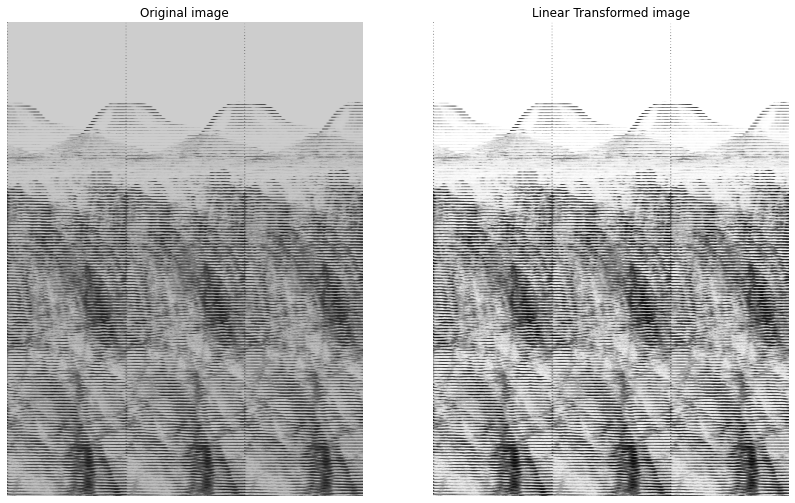

In [57]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(linear_transformed, cmap="gray", vmin=0, vmax=255)
plt.title('Linear Transformed image')
plt.axis('off')

## Satured Transformation

In [96]:
def saturated_transformation(matrix, min, max):
    matrix = np.matrix(matrix)
    matrix_transformed = (255/(max-min))*(matrix-min)
    return matrix_transformed

In [97]:
saturated_transformed = saturated_transformation(matrix,150,220)
writeImagePgm(saturated_transformed, 640, 480, 255, 'images/satured_transformed_contrast_pic1.pgm')

(-0.5, 479.5, 639.5, -0.5)

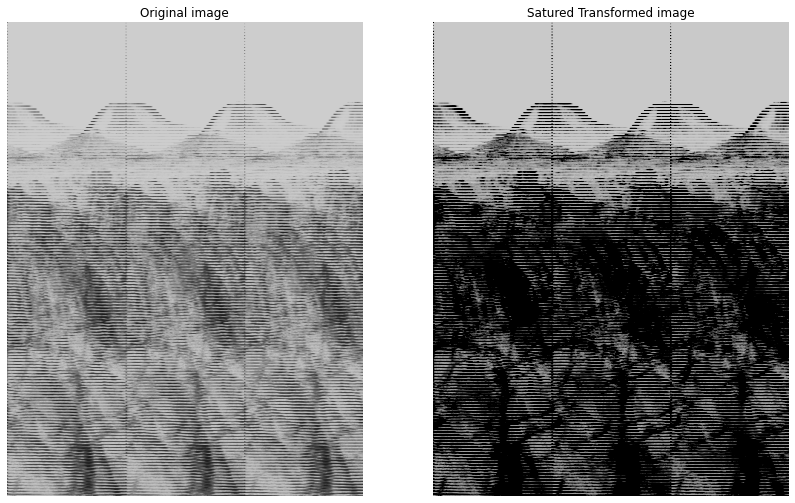

In [98]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(saturated_transformed, cmap="gray", vmin=0, vmax=255)
plt.title('Satured Transformed image')
plt.axis('off')

# Filters

In [99]:
def noise(matrix):
    matrix = np.matrix(matrix)
    arr = (np.asarray(matrix)).flatten()
    for i in range(len(arr)):
        r = random.randint(0,20)
        if(r==0):
            arr[i] = 0
        elif(r==20):
            arr[i]=255
    matrix = np.matrix(arr.reshape((640, 480)))
    return matrix

In [100]:
image_with_noise = noise(matrix)
writeImagePgm(image_with_noise, 640, 480, 255, 'images/pic1_with_noise.pgm')

(-0.5, 479.5, 639.5, -0.5)

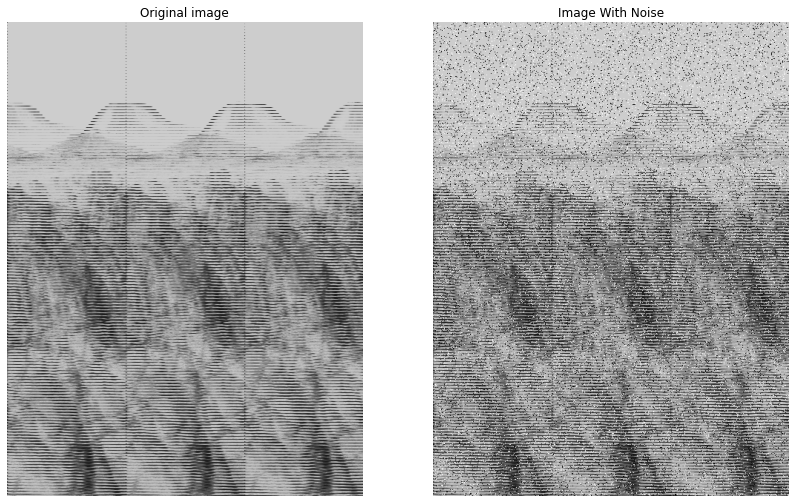

In [101]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_with_noise, cmap="gray", vmin=0, vmax=255)
plt.title('Image With Noise')
plt.axis('off')

In [102]:
def pad(matrix):
    matrix = np.matrix(matrix)
    matrix_padded = np.pad(matrix, pad_width=1, mode='constant', constant_values=0)
    return matrix_padded

In [103]:
def filer_moy(matrix):
    padded_matrix = pad(matrix)
    lx,ly = np.shape(padded_matrix)
    new_padded_matrix = np.zeros((lx,ly)).astype(int)
    for x in range(1,lx-1):
        for y in range(1,ly-1):
            new_padded_matrix[x,y] = ( padded_matrix[x-1,y-1] + padded_matrix[x,y-1] + padded_matrix[x+1,y-1] + padded_matrix[x-1,y] + padded_matrix[x,y] + padded_matrix[x+1,y] + padded_matrix[x-1,y+1] + padded_matrix[x,y+1] + padded_matrix[x+1,y+1] )/9          
    new_unpadded_matrix = np.delete(new_padded_matrix, lx-1, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, ly-1, 1)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 1)
    return new_unpadded_matrix

In [104]:
noise_filter_moy = filer_moy(image_with_noise)
writeImagePgm(noise_filter_moy, 640, 480, 255, 'images/moy_filtered_pic1_with_noise.pgm')

(-0.5, 479.5, 639.5, -0.5)

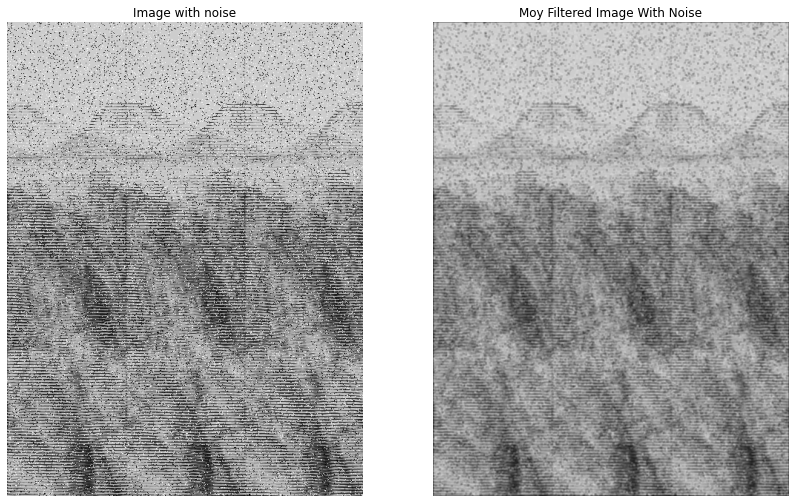

In [105]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(image_with_noise, cmap="gray", vmin=0, vmax=255)
plt.title('Image with noise')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(noise_filter_moy, cmap="gray", vmin=0, vmax=255)
plt.title('Moy Filtered Image With Noise')
plt.axis('off')

In [106]:
def filer_median(matrix):
    padded_matrix = pad(matrix)
    lx,ly = np.shape(padded_matrix)
    new_padded_matrix = np.zeros((lx,ly)).astype(int)
    for x in range(1,lx-1):
        for y in range(1,ly-1):
            arr = [padded_matrix[x-1,y-1],
                   padded_matrix[x,y-1],
                   padded_matrix[x+1,y-1],
                   padded_matrix[x-1,y],
                   padded_matrix[x,y],
                   padded_matrix[x+1,y],
                   padded_matrix[x-1,y+1],
                   padded_matrix[x,y+1],
                   padded_matrix[x+1,y+1]]
            arr = np.sort(arr)
            new_padded_matrix[x,y] = arr[4]            
    new_unpadded_matrix = np.delete(new_padded_matrix, lx-1, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, ly-1, 1)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 0)
    new_unpadded_matrix = np.delete(new_unpadded_matrix, 0, 1)
    return new_unpadded_matrix

In [107]:
noise_filter_median = filer_median(image_with_noise)
writeImagePgm(noise_filter_median, 640, 480, 255, 'images/median_filtered_pic1_with_noise.pgm')

(-0.5, 479.5, 639.5, -0.5)

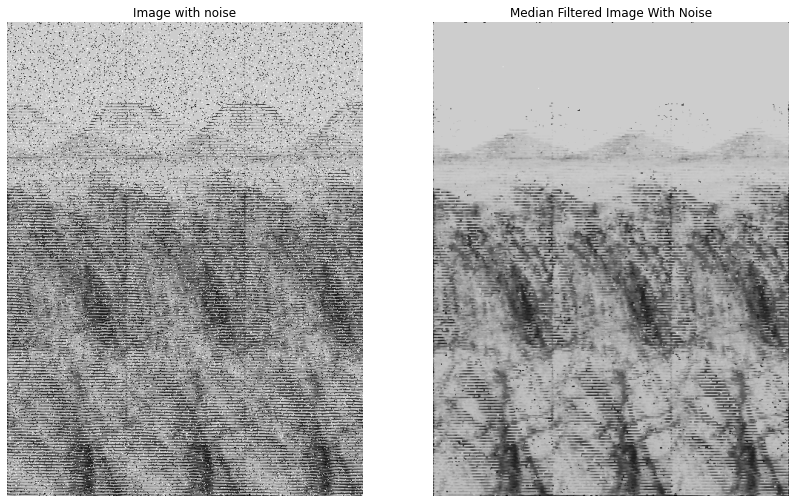

In [108]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(image_with_noise, cmap="gray", vmin=0, vmax=255)
plt.title('Image with noise')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(noise_filter_median, cmap="gray", vmin=0, vmax=255)
plt.title('Median Filtered Image With Noise')
plt.axis('off')

In [109]:
image_without_noise_filtered_moy = filer_moy(matrix) 
writeImagePgm(image_without_noise_filtered_moy, 640, 480, 255, 'images/moy_filtered_pic1_without_noise.pgm')

(-0.5, 479.5, 639.5, -0.5)

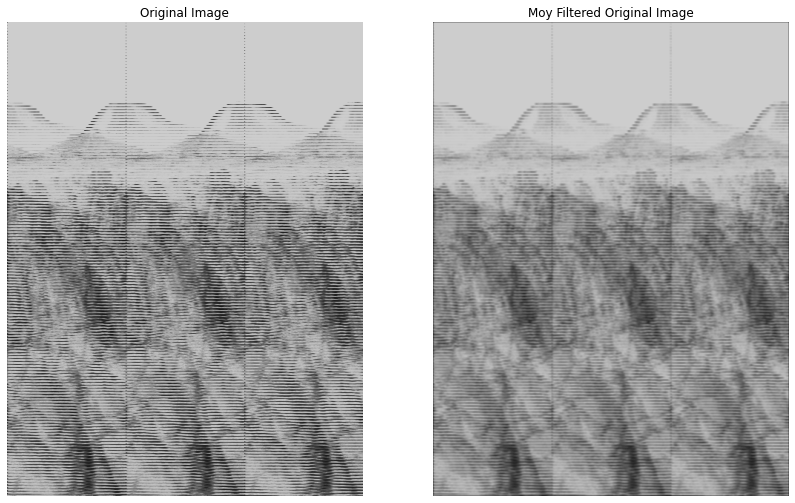

In [110]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_without_noise_filtered_moy, cmap="gray", vmin=0, vmax=255)
plt.title('Moy Filtered Original Image')
plt.axis('off')

In [111]:
image_without_noise_filtered_median = filer_median(matrix) 
writeImagePgm(image_without_noise_filtered_median, 640, 480, 255, 'images/median_filtered_pic1_without_noise.pgm')

(-0.5, 479.5, 639.5, -0.5)

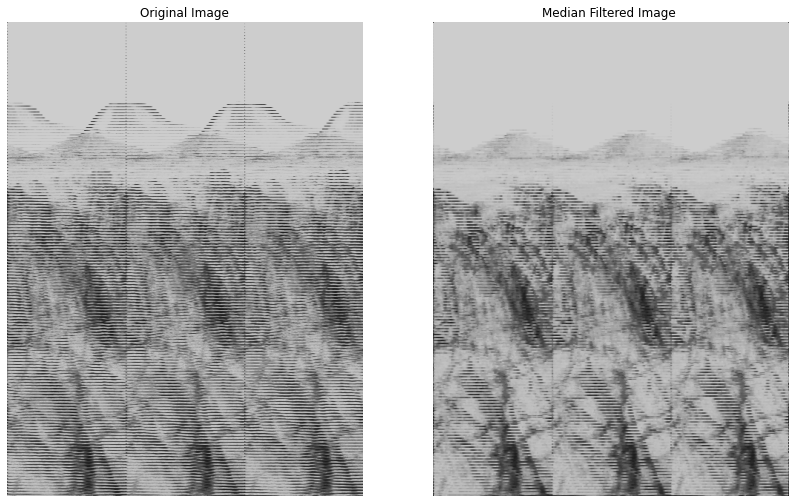

In [112]:
plt.figure(figsize=(14,14)) 
plt.subplot(1,2,1)
plt.imshow(matrix, cmap="gray", vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_without_noise_filtered_median, cmap="gray", vmin=0, vmax=255)
plt.title('Median Filtered Image ')
plt.axis('off')

## SNR (Signal to Noise Ratio)

In [113]:
def signal_to_Noise_Ratio(matrix, filtered_matrix):
    matrix = np.matrix(matrix)
    filtered_matrix = np.matrix(filtered_matrix)
    mean = matrix.mean()
    S = 0
    u = matrix-mean
    B = 0
    v = filtered_matrix - matrix
    lx,ly = np.shape(matrix)
    for x in range(lx):
        for y in range(ly):
            S = S + (u[x,y]*u[x,y])
            B = B + (v[x,y]*v[x,y])
            
    return math.sqrt(S/B)

In [114]:
print(signal_to_Noise_Ratio(matrix,noise_filter_moy))
print(signal_to_Noise_Ratio(matrix,noise_filter_median))

1.3799312656347331
1.3764984121138366
